<a href="https://colab.research.google.com/github/Imshyeon/2023_AI_BACKEND_AI/blob/master/Machine%20Learning/09_27_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

iris = sns.load_dataset('iris')

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [8]:
DF=iris.iloc[:,:-1].copy()
DF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# K-means Clustering

In [9]:
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters=3,
                  init='k-means++',
                  max_iter=15,
                  random_state=2045)
kmeans_3.fit(DF)

KMeans(max_iter=15, n_clusters=3, random_state=2045)

In [10]:
kmeans_3.n_iter_

5

In [11]:
kmeans_3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [12]:
kmeans_3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [13]:
kmeans_3.inertia_

78.851441426146

# Scree Plot

In [15]:
inertia=[]

K=range(1,10)

for k in K:
  kmeanModel=KMeans(n_clusters=k)
  kmeanModel.fit(DF)
  inertia.append(kmeanModel.inertia_)

In [16]:
inertia

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.446182051282065,
 39.066035353535355,
 34.34316797237851,
 30.01439849624061,
 28.01491833312887]

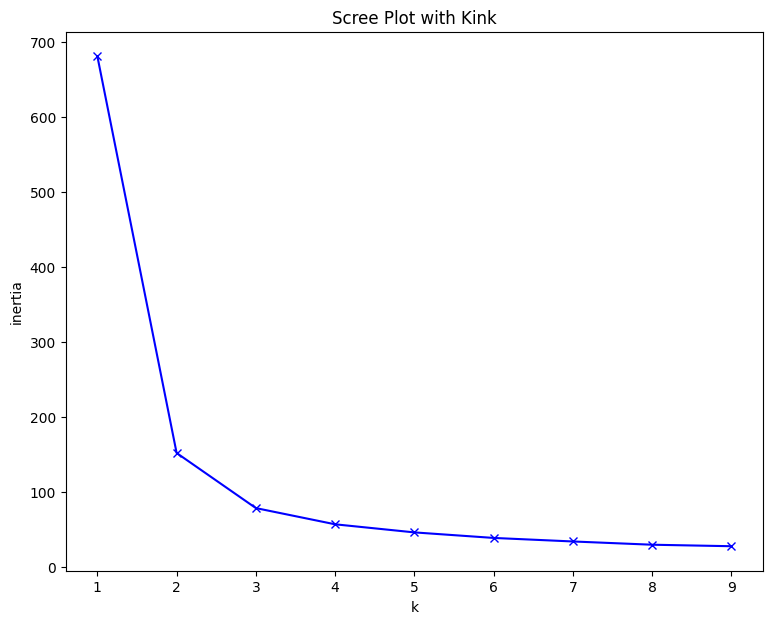

In [17]:
plt.figure(figsize=(9,7))
plt.plot(K,inertia,'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Scree Plot with Kink')
plt.show()

# Visualization with PCA

In [18]:
DF['cluster'] = kmeans_3.labels_
DF['target']=iris.species
DF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa


In [19]:
DF.groupby('target')['cluster'].value_counts()

target      cluster
setosa      1          50
versicolor  0          48
            2           2
virginica   2          36
            0          14
Name: cluster, dtype: int64

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.iloc[:,:-1])
pca_transformed[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [21]:
DF['pca_x']=pca_transformed[:,0]
DF['pca_y']=pca_transformed[:,1]

In [22]:
DF.head(5)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,setosa,-2.728717,0.326755


In [23]:
idx_0=DF[DF['cluster'] == 0].index
idx_1=DF[DF['cluster'] == 1].index
idx_2=DF[DF['cluster'] == 2].index

In [24]:
idx_0, idx_1, idx_2

(Int64Index([ 50,  51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
              64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
              78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
              91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 106, 113, 114,
             119, 121, 123, 126, 127, 133, 138, 142, 146, 149],
            dtype='int64'),
 Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
            dtype='int64'),
 Int64Index([ 52,  77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112,
             115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132,
             134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148],
            dtype='int64'))

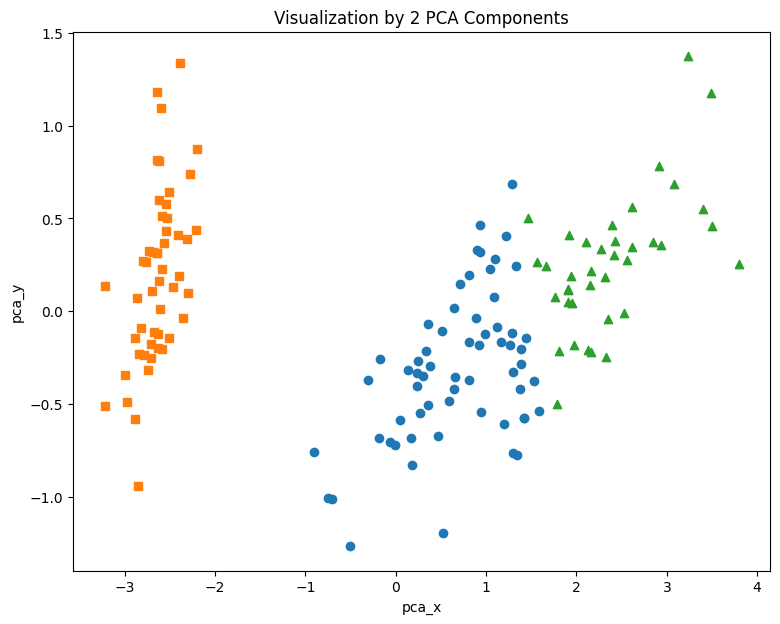

In [25]:
plt.figure(figsize=(9,7))
plt.scatter(x=DF.loc[idx_0,'pca_x'],
                  y=DF.loc[idx_0,'pca_y'],
                  marker='o')
plt.scatter(x=DF.loc[idx_1,'pca_x'],
                  y=DF.loc[idx_1,'pca_y'],
                  marker='s')
plt.scatter(x=DF.loc[idx_2,'pca_x'],
                  y=DF.loc[idx_2,'pca_y'],
                  marker='^')

plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.title('Visualization by 2 PCA Components')
plt.show()